# ***Replace Missing Value with 0***

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd

# ตั้งค่าที่อยู่ของไฟล์ CSV ใน Google Drive
file_path = '/content/drive/MyDrive/00.WaterQuality/water_potability.csv'

# โหลดไฟล์ CSV เป็น DataFrame
df = pd.read_csv(file_path)

# แสดงข้อมูลใน
# df.info()
print(df.info())
print('Shape of the Dataset =', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
Shape of the Dataset = (3276, 10)


In [46]:
#Missing Values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

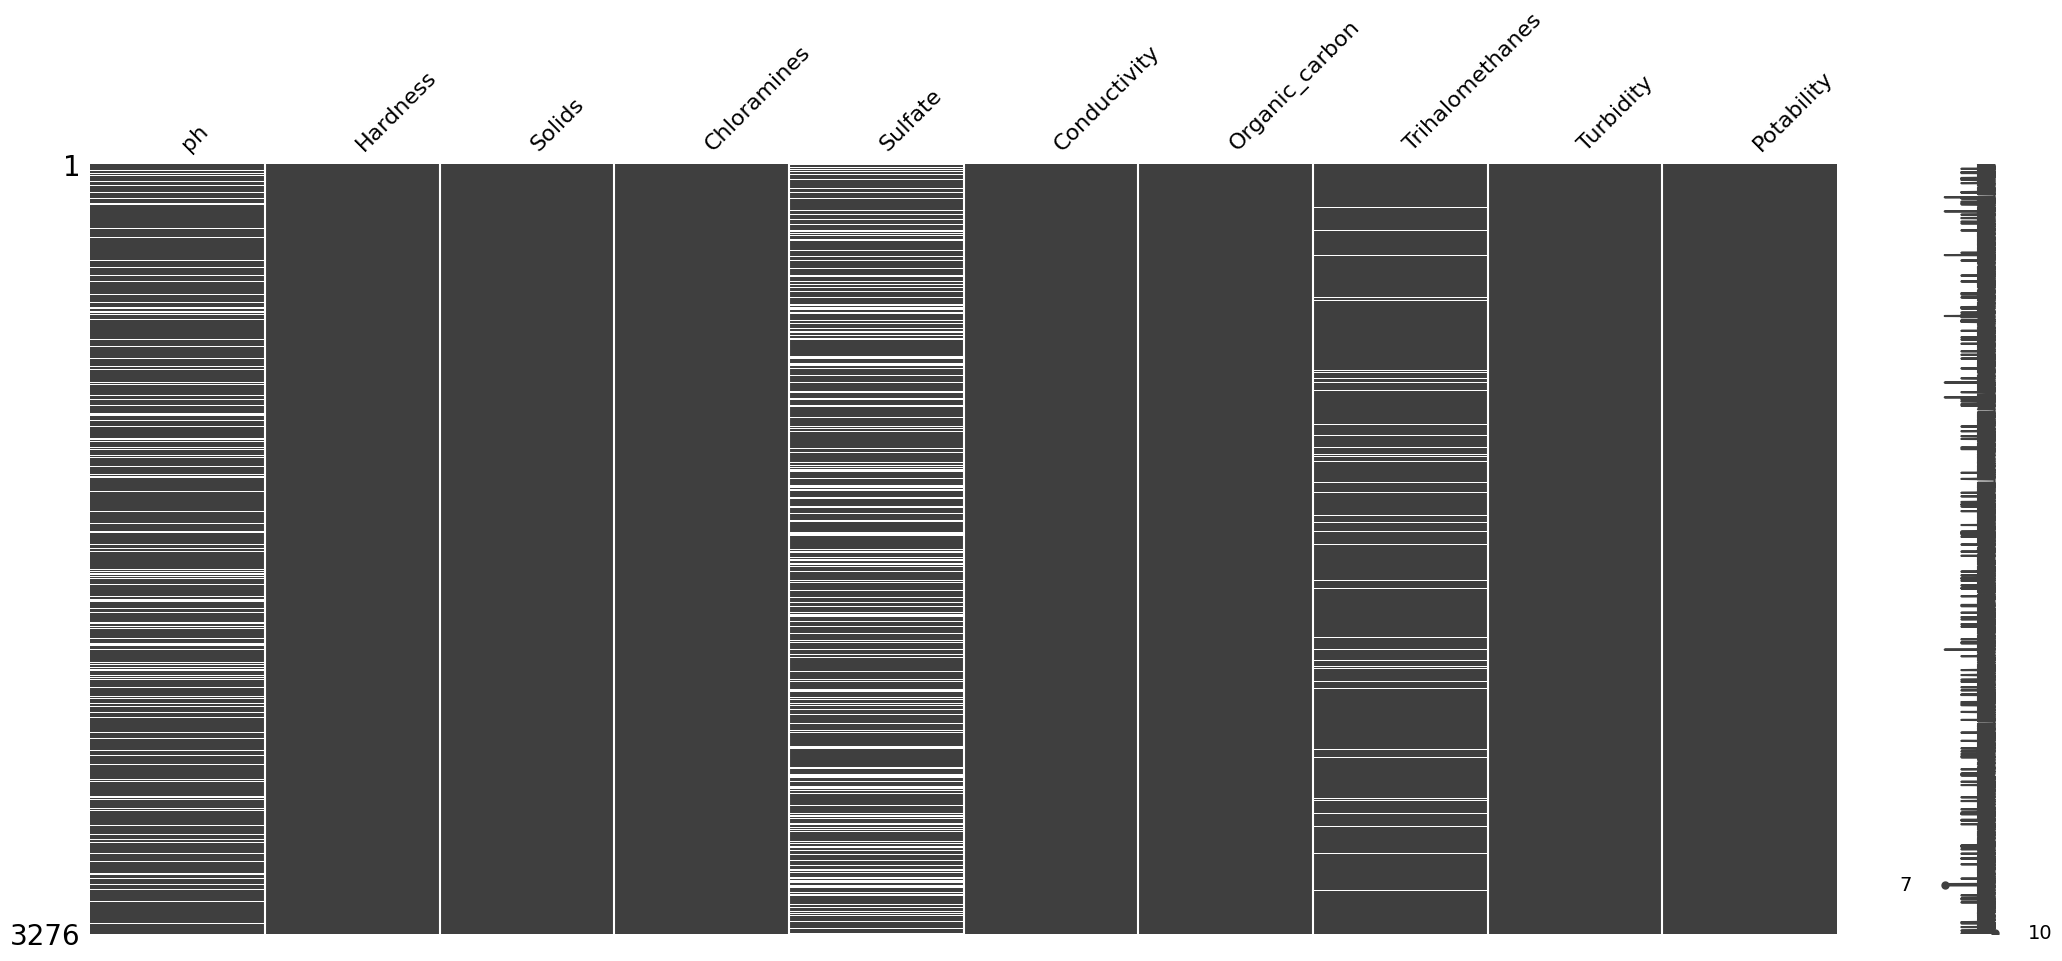

In [47]:
# Missing Values Visualization
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

In [48]:
df.fillna(0, inplace=True)

In [49]:
#Missing Values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
# Train-Test Split (if not done yet)
from sklearn.model_selection import train_test_split

X = df.drop('Potability',axis=1).values
y = df['Potability'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
import warnings
warnings.filterwarnings('ignore')

# Basic imports
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import precision_score



# filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))

finalResults.sort(key=lambda k:k[1],reverse=True)
for name, score in finalResults:
    print(f"{name}: {score:.4f}")


RF: 0.6605
SVC: 0.6492
XGB: 0.6108
NuSVC: 0.6039
GNB: 0.5818
DTC: 0.5719
KNN: 0.5452
ADA: 0.5441
SGDC: 0.5307
Perc: 0.5251
NC: 0.5148
PAC: 0.5118
LR: 0.3067
Ridge: 0.3067
BNB: 0.3067


In [52]:
# Since the execution state was reset, we need to re-import the necessary libraries and redefine any variables or functions.
# However, for the purpose of saving the results to an Excel file, we can create a DataFrame from the finalResults list.

import pandas as pd

# Assuming finalResults is a list of tuples with model names and their precision scores
# Let's create a DataFrame from this list
results_df = pd.DataFrame(finalResults, columns=['Model', 'Precision Score'])

# Now, save this DataFrame to an Excel file
excel_path = '/content/drive/MyDrive/00.WaterQuality/model_Version/model_precision_scores_V01.xlsx'
results_df.to_excel(excel_path, index=False)

excel_path  # Providing the path to the saved Excel file for access



'/content/drive/MyDrive/00.WaterQuality/model_Version/model_precision_scores_V01.xlsx'